# Board Games Analysis
#### Predicting the rating for another board game

In [19]:
import pandas as pd
import numpy as np
board_games = pd.read_csv('board_games.csv')
print(board_games.head())

       id       type                                       name  \
0   12333  boardgame                          Twilight Struggle   
1  120677  boardgame                              Terra Mystica   
2  102794  boardgame                  Caverna: The Cave Farmers   
3   25613  boardgame  Through the Ages: A Story of Civilization   
4    3076  boardgame                                Puerto Rico   

   yearpublished  minplayers  maxplayers  playingtime  minplaytime  \
0         2005.0         2.0         2.0        180.0        180.0   
1         2012.0         2.0         5.0        150.0         60.0   
2         2013.0         1.0         7.0        210.0         30.0   
3         2006.0         2.0         4.0        240.0        240.0   
4         2002.0         2.0         5.0        150.0         90.0   

   maxplaytime  minage  users_rated  average_rating  bayes_average_rating  \
0        180.0    13.0        20113         8.33774               8.22186   
1        150.0    12.0

In [3]:
board_games = board_games.dropna(axis=0)
board_games = board_games[board_games['users_rated'] > 0]

In [9]:
print(board_games.head())

       id       type                                       name  \
0   12333  boardgame                          Twilight Struggle   
1  120677  boardgame                              Terra Mystica   
2  102794  boardgame                  Caverna: The Cave Farmers   
3   25613  boardgame  Through the Ages: A Story of Civilization   
4    3076  boardgame                                Puerto Rico   

   yearpublished  minplayers  maxplayers  playingtime  minplaytime  \
0         2005.0         2.0         2.0        180.0        180.0   
1         2012.0         2.0         5.0        150.0         60.0   
2         2013.0         1.0         7.0        210.0         30.0   
3         2006.0         2.0         4.0        240.0        240.0   
4         2002.0         2.0         5.0        150.0         90.0   

   maxplaytime  minage  users_rated  average_rating  bayes_average_rating  \
0        180.0    13.0        20113         8.33774               8.22186   
1        150.0    12.0

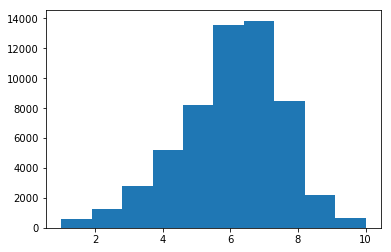

In [4]:
average_ratings = board_games['average_rating']
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(average_ratings)
plt.show()

In [5]:
print(average_ratings.std())
print(average_ratings.mean())

1.5788299348332662
6.016112849333889


In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=5, random_state=1)
numeric_columns = board_games.iloc[:,3:]

In [7]:
kmeans_model.fit(numeric_columns)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [8]:
labels = kmeans_model.labels_
print(labels)

[1 1 1 ..., 0 0 0]


In [9]:
game_mean = numeric_columns.apply(np.mean, axis=1)

In [17]:
print(game_mean)

0        4478.431293
1        3088.451729
2        2259.009636
3        2852.172936
4        7580.177296
5        7869.269574
6        3488.818294
7        3080.732679
8        3250.362364
9        3246.403405
10       6632.371274
11       1255.041491
12       1060.583884
13       2667.186476
14       3167.116141
15       1824.625254
16       2471.526979
17       2269.558746
18       7085.071643
19       3682.607443
20       1568.860090
21       3787.645789
22       2217.973394
23       5597.606346
24       2641.436587
25       3073.474584
26       2084.640816
27       3988.717611
28       3997.052251
29       2680.055045
            ...     
81134      11.571429
81160       5.571429
81162       7.214286
81176      18.657143
81177      18.657143
81178      18.414286
81179      18.636905
81180      18.636905
81181      18.571429
81184      18.357143
81188       5.714286
81190      19.714286
81192       8.500000
81193       8.250000
81195       4.000000
81198       6.357143
81199      10

In [11]:
game_std = numeric_columns.apply(np.std, axis=1)
print(game_std)

0         7450.209585
1         4933.084135
2         3514.218155
3         4367.915199
4        13321.625345
5        13835.712890
6         6430.891699
7         5080.012838
8         5735.631563
9         5276.607380
10       11541.097552
11        2158.283722
12        1690.110390
13        4323.936728
14        5080.990786
15        2824.992056
16        4127.594817
17        3738.144858
18       12989.620958
19        5986.346082
20        2466.262948
21        7315.464445
22        3361.624754
23        9882.541264
24        5116.821634
25        4942.324699
26        3592.078960
27        7023.556700
28        6861.827535
29        4090.325069
             ...     
81134      471.986056
81160      473.015863
81162       10.030749
81176      470.714437
81177      470.708563
81178      470.759273
81179      470.713910
81180      470.713910
81181      470.734316
81184      471.273149
81188      472.947710
81190      470.967399
81192      472.384630
81193      472.432002
81195     

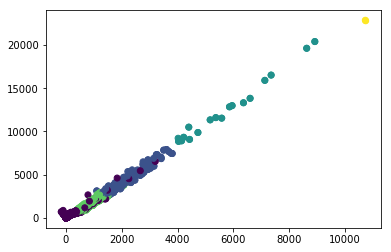

In [12]:
plt.scatter(x=game_mean,y=game_std, c=labels)
plt.show()

In [13]:
correlations = board_games.corr()
print(correlations['average_rating'])

id                      0.304201
yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64


In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
cols = ['yearpublished','minage','average_weight']
model.fit(board_games[cols], board_games['average_rating'])
predictions = model.predict(board_games[cols])
mse = mean_squared_error(board_games['average_rating'], predictions)
print(mse)

2.1405805187


In [16]:
board_games['player_range'] = board_games['maxplayers'] - board_games['minplayers']
board_games['time_range'] = board_games['maxplaytime'] - board_games['minplaytime']
board_games['avg. rating'] = board_games['total_owners']/board_games['users_rated']

In [17]:
print(board_games.head())

       id       type                                       name  \
0   12333  boardgame                          Twilight Struggle   
1  120677  boardgame                              Terra Mystica   
2  102794  boardgame                  Caverna: The Cave Farmers   
3   25613  boardgame  Through the Ages: A Story of Civilization   
4    3076  boardgame                                Puerto Rico   

   yearpublished  minplayers  maxplayers  playingtime  minplaytime  \
0         2005.0         2.0         2.0        180.0        180.0   
1         2012.0         2.0         5.0        150.0         60.0   
2         2013.0         1.0         7.0        210.0         30.0   
3         2006.0         2.0         4.0        240.0        240.0   
4         2002.0         2.0         5.0        150.0         90.0   

   maxplaytime  minage     ...       total_owners  total_traders  \
0        180.0    13.0     ...              26647            372   
1        150.0    12.0     ...          

In [20]:
# Dividing the dataset into train(70) and test(30)
shuffled_rows = np.random.permutation(board_games.index)
shuffled_games = board_games.iloc[shuffled_rows]
highest_train_row = int(shuffled_games.shape[0]*0.70)
train = shuffled_games.iloc[0:highest_train_row]
test = shuffled_games.iloc[highest_train_row:]
print(train.shape[0])
print(test.shape[0])

56918
24394


In [22]:
list(board_games.columns)

['id',
 'type',
 'name',
 'yearpublished',
 'minplayers',
 'maxplayers',
 'playingtime',
 'minplaytime',
 'maxplaytime',
 'minage',
 'users_rated',
 'average_rating',
 'bayes_average_rating',
 'total_owners',
 'total_traders',
 'total_wanters',
 'total_wishers',
 'total_comments',
 'total_weights',
 'average_weight']

In [23]:
correlations = board_games.corr()
print(correlations['average_rating'])

id                     -0.083589
yearpublished           0.191931
minplayers              0.009179
maxplayers             -0.004300
playingtime             0.053804
minplaytime             0.052346
maxplaytime             0.053804
minage                  0.240032
users_rated             0.131803
average_rating          1.000000
bayes_average_rating    0.386627
total_owners            0.161397
total_traders           0.186959
total_wanters           0.204421
total_wishers           0.176191
total_comments          0.154758
total_weights           0.130914
average_weight          0.554294
Name: average_rating, dtype: float64


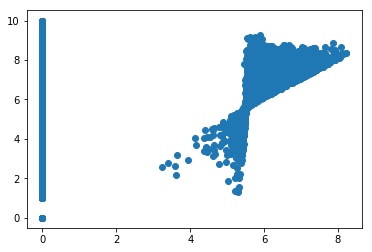

In [28]:
plt.scatter(board_games['bayes_average_rating'], board_games['average_rating'])
plt.show()

In [30]:
#  Fitting an alternate linear model
import statsmodels.api as sm
y = board_games['average_rating']
x = board_games['bayes_average_rating']
x = sm.add_constant(x)

linear = sm.OLS(y, x)
linearfit = linear.fit()
print(linearfit.summary())


                            OLS Regression Results                            
Dep. Variable:         average_rating   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                 1.429e+04
Date:                Fri, 03 Mar 2017   Prob (F-statistic):               0.00
Time:                        02:25:24   Log-Likelihood:            -1.9964e+05
No. Observations:               81312   AIC:                         3.993e+05
Df Residuals:                   81310   BIC:                         3.993e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                    3.6275 